## Window 1

* [locations Discovery Service - Oceans 2.0 API - Ocean Networks Canada](https://wiki.oceannetworks.ca/display/O2A/locations+Discovery+Service)
* [https://data.oceannetworks.ca/apiproxy/devices?method=get&deviceCategoryCode=BPR&dateFrom=2019-07-01T00:00:00.000Z&dateTo=2020-06-30T23:59:59.999Z](https://data.oceannetworks.ca/apiproxy/devices?method=get&deviceCategoryCode=BPR&dateFrom=2019-07-01T00:00:00.000Z&dateTo=2020-06-30T23:59:59.999Z)
* [https://data.oceannetworks.ca/apiproxy/locations?method=get&deviceCategoryCode=BPR&dateFrom=2019-07-01T00:00:00.000Z&dateTo=2020-06-30T23:59:59.999Z](https://data.oceannetworks.ca/apiproxy/locations?method=get&deviceCategoryCode=BPR&dateFrom=2019-07-01T00:00:00.000Z&dateTo=2020-06-30T23:59:59.999Z)
* [https://data.oceannetworks.ca/apiproxy/deployments?method=get&deviceCategoryCode=BPR&dateFrom=2020-01-01T00:00:00.000Z](https://data.oceannetworks.ca/apiproxy/deployments?method=get&deviceCategoryCode=BPR&dateFrom=2020-01-01T00:00:00.000Z)
* [Data Search: Ocean Networks Canada - Oceans 2.0](https://data.oceannetworks.ca/DataSearch?location=KEMF&deviceCategory=BPR)
* [Device Details: Ocean Networks Canada - Oceans 2.0](https://data.oceannetworks.ca/DeviceListing?DeviceId=10703)
* [https://data.oceannetworks.ca/DeviceSensorService?deviceId=10703](https://data.oceannetworks.ca/DeviceSensorService?deviceId=10703)
* [Data Preview: Ocean Networks Canada - Oceans 2.0](https://data.oceannetworks.ca/home?TREETYPE=1&LOCATION=29&DEVICECATEGORY=5&TIMECONFIG=2)
* [Plotting Utility: Ocean Networks Canada - Oceans 2.0](https://data.oceannetworks.ca/PlottingUtility)
* [Device Console: Ocean Networks Canada - Oceans 2.0](https://data.oceannetworks.ca/DC?TREETYPE=10&OBSERVATORY=8&STATION=102&DEVICE=10401&DEVICE=10513&DEVICE=12501&TAB=Device%20Control)
* [Plotting Utility: Ocean Networks Canada - Oceans 2.0](https://data.oceannetworks.ca/PlottingUtility?TREETYPE=26&LOCATION=30&DEVICECATEGORY=3&SENSOR=9082&DATEFROM=18-May-2014%2020:50:15&DATETO=14-Feb-2020%2002:28:03)
* [Plot (500×300)](https://data.oceannetworks.ca/Plot?sensorId=4176&plotwidth=500&plotheight=300)
* [BeakerX](https://beakerx.com/)
* [[OC-75] National Tsunami Warning Center support - DMAS Jira](https://jira.oceannetworks.ca/browse/OC-75)


In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import requests
import numpy as np
import pandas as pd

from get_ONC_token import get_ONC_token
token = get_ONC_token()

In [12]:
def geo_dist(x1, x2):
    #print(x1)
    # approximate radius of earth in km
    R = 6373.0

    lat1 = np.radians(x1[0])
    lon1 = np.radians(x1[1])
    lat2 = np.radians(x2[0])
    lon2 = np.radians(x2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c



In [11]:
x1 = np.array([[48.,-128.],[47,-128],[47,-128]])
x2 = np.array([[48.,-127.],[47,-127],[48,-128]])

geo_dist(x1, x2)


array([ 74.42676405,  75.85804885, 111.22983323])

In [13]:
# https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist

In [14]:
url = 'https://data.oceannetworks.ca/api/deployments'
deployments = []

for deviceCategoryCode in ['BPR', 'CORK', 'TILTMTR', 'CTD']:
    params = {'method' : 'get',
              'token' : token,
             'deviceCategoryCode' : deviceCategoryCode,
             'dateFrom' : '2020-01-01T00:00:00.000Z'}

    r = requests.get(url, params = params)
    deps = r.json()
    for dep in deps:
        dep['deviceCategoryCode'] = deviceCategoryCode
        deployments.append(dep)



In [15]:
url = 'https://data.oceannetworks.ca/api/locations'
locations = []

for deviceCategoryCode in ['BPR', 'CORK', 'TILTMTR', 'CTD']:
    params = {'method' : 'get',
              'token' : token,
             'deviceCategoryCode' : deviceCategoryCode,
             'dateFrom' : '2020-01-01T00:00:00.000Z'}

    r = requests.get(url, params = params)
    locs = r.json()
    for loc in locs:
        loc['deviceCategoryCode'] = deviceCategoryCode
        loc['bbox'] = None
        locations.append(loc)


In [86]:
url = 'https://data.oceannetworks.ca/api/locations'
params = {'method' : 'getTree', 'token' : token}
r = requests.get(url, params = params)
tree = r.json()

def buildTree(root,nodes={},name_path=''):
    for child in root['children']:
        new_path = name_path + '/' + child['locationName']
        nodes[child['locationCode']]=(new_path, child['description'])
        if child['children']:
            buildTree(child,nodes,new_path)
    return nodes
        
        
locTree = buildTree(tree[0])
locPaths = pd.DataFrame.from_dict(locTree,orient='index',columns=['path','description'])

In [92]:
df['path'] = df.join(locPaths['path'],on='locationCode')['path']

In [89]:
df['locationCode']

0     CNE20
1      CW25
2      ENEF
3      ENWF
4      FGPD
      ...  
63    SCVIP
65    SEVIP
66     SVN8
67    USDDL
68    YPVPP
Name: locationCode, Length: 65, dtype: object

In [16]:
locs = pd.DataFrame(locations)
locs
#locs
#locations
#r.url

,deployments,locationName,depth,bbox,description,hasDeviceData,lon,locationCode,hasPropertyData,lat,dataSearchURL,deviceCategoryCode
0,1,North East 20km,2640.00000,None,Depth: 2644 m Latitude:47.906282 Longitude: -1...,true,-127.620529,CNE20,false,47.906236,http://data.oceannetworks.ca/DataSearch?locati...,BPR
1,1,West 25km,2639.00000,None,Depth: 2620 m Latitude:47.7655 Longitude: -128...,true,-128.057662,CW25,false,47.764034,http://data.oceannetworks.ca/DataSearch?locati...,BPR
2,1,Node,2325.00000,None,Depth: TBD m Latitude: TBD Longitude: TBD Ty...,true,-129.035485,ENEF,false,47.958635,http://data.oceannetworks.ca/DataSearch?locati...,BPR
3,1,West Flank,2360.00000,None,Depth: 2377 m Latitude: 47.9594 Longitude: -12...,true,-129.124283,ENWF,false,47.959863,http://data.oceannetworks.ca/DataSearch?locati...,BPR
4,1,Folger Deep,95.00000,None,Depth: 94 m Latitude: 48.8137 Longitude: -125....,true,-125.280989,FGPD,false,48.814027,http://data.oceannetworks.ca/DataSearch?locati...,BPR
...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,Seirios,1.40060,None,Platform: Remotely Operated Vehicle operated b...,true,-83.394384,SEIR,false,23.989199,http://data.oceannetworks.ca/DataSearch?locati...,CTD
65,1,Strait of Georgia East VENUS Instrument Platform,164.00000,None,Depth: 170 m Latitude: 49.04316 Longitude: -12...,true,-123.316847,SEVIP,false,49.043106,http://data.oceannetworks.ca/DataSearch?locati...,CTD
66,1,Patrol 8,106.80295,None,A patrol is a person or team that conducts CTD...,true,-123.306430,SVN8,false,49.325456,http://data.oceannetworks.ca/DataSearch?locati...,CTD
67,1,Delta Dynamics Laboratory,110.00000,None,"For research information, contact Martin Scher...",true,-123.330165,USDDL,false,49.085097,http://data.oceannetworks.ca/DataSearch?locati...,CTD


In [149]:
#df['locationName'] = locs.loc[df['locationCode'].values]['locationName'].values
#locs.loc[df['locationCode'].values]['locationName']
#len(df['locationCode'].values)
#len(locs)


locationCode
CNE20                                     North East 20km
CW25                                            West 25km
ENEF                                                 Node
ENWF                                           West Flank
FGPD                                          Folger Deep
                               ...                       
SCVIP         Strait of Georgia VENUS Instrument Platform
SEVIP    Strait of Georgia East VENUS Instrument Platform
SVN8                                             Patrol 8
USDDL                           Delta Dynamics Laboratory
YPVPP                        Profiling Instrument Package
Name: locationName, Length: 77, dtype: object

In [21]:
#locs.set_index(['locationCode','deviceCategoryCode']).join(df.set_index(['locationCode','deviceCategoryCode']))
#
df


,begin,depth,deviceCode,end,hasDeviceData,heading,lat,locationCode,lon,pitch,roll,deviceCategoryCode,locationName,cluster
0,2016-06-22T22:23:38.000Z,2640.00000,BPR_BC,None,True,NaN,47.906236,CNE20,-127.620529,NaN,NaN,BPR,North East 20km,9
1,2016-05-28T01:12:42.000Z,2639.00000,BPR-1027NW,None,True,NaN,47.764034,CW25,-128.057662,NaN,NaN,BPR,West 25km,10
2,2018-06-28T08:23:19.000Z,2325.00000,NRCANBPR8C,None,True,NaN,47.958635,ENEF,-129.035485,NaN,NaN,BPR,Node,6
3,2016-06-21T17:52:54.000Z,2360.00000,NRCANBPRB8,None,True,NaN,47.959863,ENWF,-129.124283,NaN,NaN,BPR,West Flank,5
4,2017-05-01T21:52:25.000Z,95.00000,NRCANBPR05,None,True,NaN,48.814027,FGPD,-125.280989,NaN,NaN,BPR,Folger Deep,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2018-09-30T16:40:16.000Z,296.00000,SBECTD19p6937,None,True,NaN,49.040016,SCVIP,-123.425450,NaN,NaN,CTD,Strait of Georgia VENUS Instrument Platform,22
65,2018-10-01T14:54:26.000Z,164.00000,SBECTD19p7128,None,True,NaN,49.043106,SEVIP,-123.316847,NaN,NaN,CTD,Strait of Georgia East VENUS Instrument Platform,20
66,2019-03-06T00:00:00.000Z,106.80295,RBRCONCERTO65647,2020-02-03T00:00:00.000Z,True,NaN,49.325456,SVN8,-123.306430,NaN,NaN,CTD,Patrol 8,24
67,2019-09-15T03:09:03.000Z,110.00000,SBECTD19p6935,None,True,NaN,49.085097,USDDL,-123.330165,NaN,NaN,CTD,Delta Dynamics Laboratory,21


In [17]:
df = pd.DataFrame(deployments)
df = df[df['lon']<-120.]
df =df[df['locationName'].str.contains('Patrol') == False]
df['locationName'] = df.set_index(['locationCode','deviceCategoryCode']).join(locs.set_index(['locationCode','deviceCategoryCode'])['locationName'])['locationName'].values
dep_coords = df[['lat','lon']].values



In [19]:
y = pdist(dep_coords, metric = geo_dist)
z = shc.linkage(y)
c = shc.fcluster(z, 1., criterion='distance')

In [20]:
#df = pd.DataFrame(deployments)
df['cluster'] = c

In [22]:
for i in range(1,c.max()+1):
    print('---- %d ----' % i)
    print(df[df['cluster'] == i][['locationCode','deviceCategoryCode','deviceCode','locationName']])
    print('----------\n')
        

---- 1 ----
   locationCode deviceCategoryCode           deviceCode  \
10         NCHR                BPR  RBRQUARTZ3BPR201419   
47        RCNE1                CTD     SBECTD37SIP16434   
48        RCNE2                CTD     SBECTD37SIP16433   
49        RCNE3                CTD     SBECTD37SIP16432   
50        RCNE4                CTD     SBECTD37SIP16431   
51        RCNW1                CTD      SBECTD37SIP5677   
52        RCNW2                CTD      SBECTD37SIP8464   
53        RCNW3                CTD     SBECTD37SIP16435   
54        RCNW4                CTD      SBECTD37SIP5695   

                          locationName  
10  Regional Circulation Mooring North  
47                          NE-005 mab  
48                          NE-050 mab  
49                          NE-125 mab  
50                          NE-200 mab  
51                          NW-005 mab  
52                          NW-050 mab  
53                          NW-125 mab  
54                          

In [23]:
df.sort_values('cluster').sort_values('deviceCategoryCode')


,begin,depth,deviceCode,end,hasDeviceData,heading,lat,locationCode,lon,pitch,roll,deviceCategoryCode,locationName,cluster
6,2016-06-19T04:24:26.000Z,2275.0,NRCANBPR06,None,True,NaN,47.924088,KEMO,-129.108200,NaN,NaN,BPR,Mothra,3
4,2017-05-01T21:52:25.000Z,95.0,NRCANBPR05,None,True,NaN,48.814027,FGPD,-125.280989,NaN,NaN,BPR,Folger Deep,16
9,2019-09-07T06:41:51.000Z,293.0,BPR-Folger-59,None,True,NaN,48.427295,NCBC,-126.174705,NaN,NaN,BPR,Upper Slope,13
8,2009-09-06T15:05:58.000Z,1258.0,BPR_889,None,True,NaN,48.670835,NC89,-126.847965,NaN,NaN,BPR,Bullseye,11
1,2016-05-28T01:12:42.000Z,2639.0,BPR-1027NW,None,True,NaN,47.764034,CW25,-128.057662,NaN,NaN,BPR,West 25km,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,2018-08-01T07:43:57.000Z,871.0,SBECTD19p7876,None,True,NaN,48.312102,BACHY,-126.065790,NaN,NaN,CTD,Hydrates,15
40,2018-10-24T00:00:00.000Z,44.1,AMLMETRECX50149,None,True,NaN,53.974785,KVIP.C2,-128.657183,NaN,NaN,CTD,CTD AML,36
16,2018-06-24T08:34:57.000Z,2656.0,RBRTILTMETERACCBPR63057,None,True,310.0,47.756717,CBC27.Z1,-127.731602,NaN,NaN,TILTMTR,Tilt Meter,7
17,2017-06-14T11:27:53.000Z,1259.0,RBRTILTMETERACCBPR63055,None,True,NaN,48.670870,NC89.Z1,-126.848141,NaN,NaN,TILTMTR,Tilt Meter,11


<IPython.core.display.Javascript object>


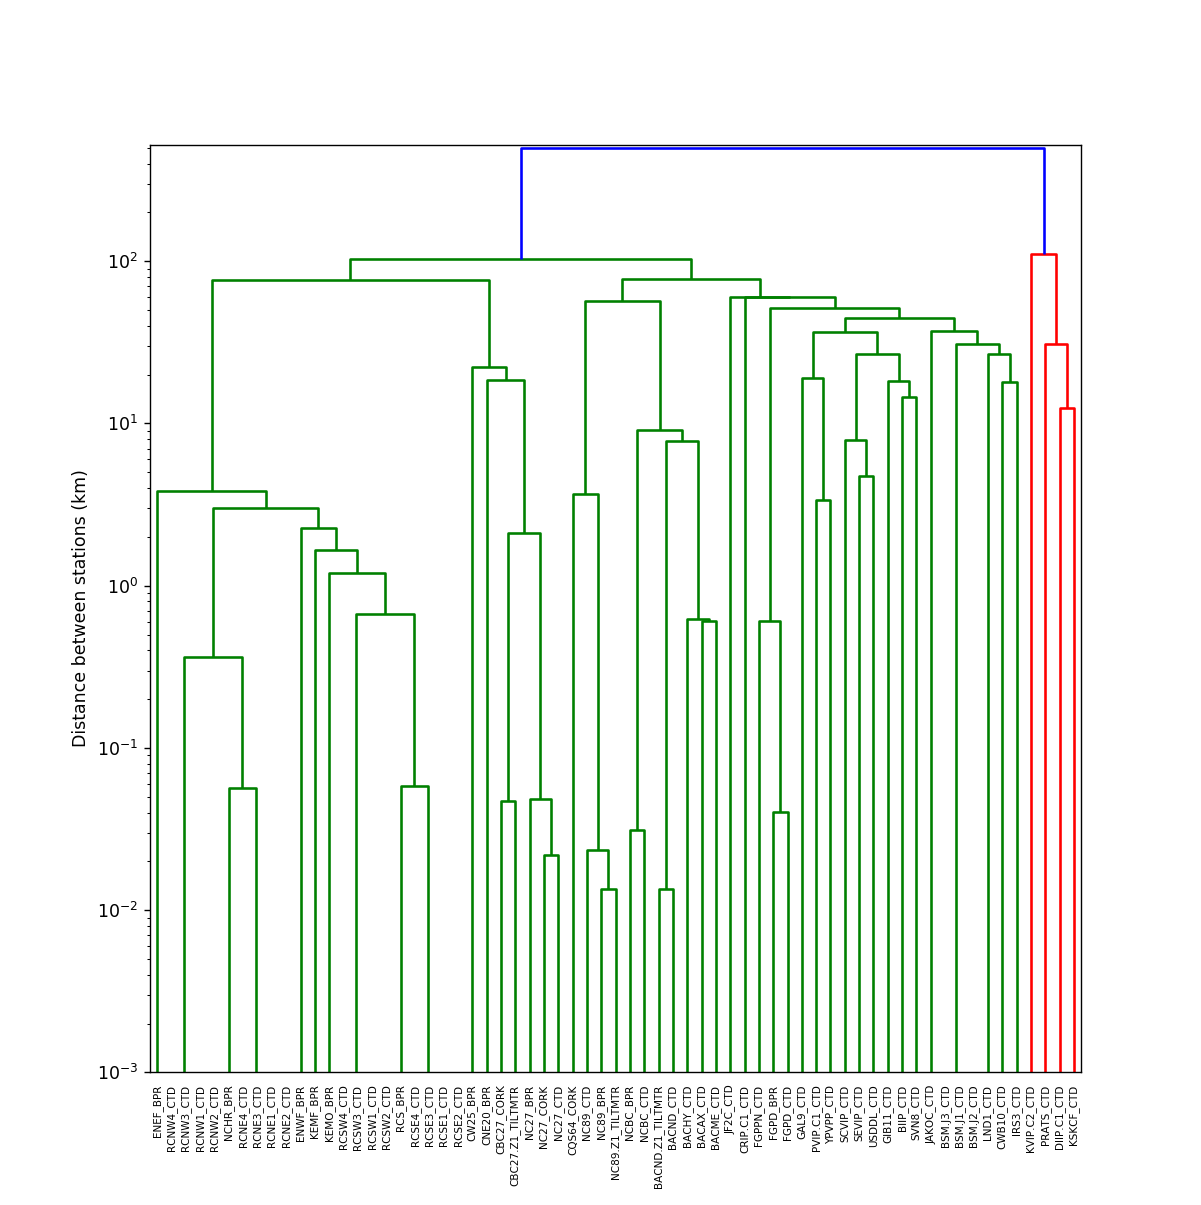

Text(0, 0.5, 'Distance between stations (km)')

In [27]:
ax = plt.gca()
plt.yscale('log')
plt.ylim((0.001,1000))
dend = shc.dendrogram(z,labels=(df['locationCode'].str.cat(df['deviceCategoryCode'],sep="_")).values)
plt.ylabel('Distance between stations (km)')


In [133]:
# https://ipyleaflet.readthedocs.io/en/latest/api_reference/layers_control.html
from ipyleaflet import Map, Marker, basemaps, MarkerCluster, LayerGroup,Circle,LayersControl,GeoJSON,WMSLayer


In [117]:
m = Map(center=(48,-128), zoom=5,basemap=basemaps.Esri.WorldImagery)
display(m)
m.layout.width = '100%'
m.layout.height = '800px'


Map(center=[48, -128], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [114]:
markers = []
for idx in range(len(df)):
    row = df.iloc[idx]
    markers.append(Marker(location = (row['lat'], row['lon']),
                          title = '%s %s' % (row['locationCode'],row['deviceCategoryCode'])))
    
#a = Marker(location=(48.,-129.))
#m.add_layer(a)

In [42]:
m.add_layer(MarkerCluster(markers=markers, title='Hi!!!'))

In [119]:
m.add_layer(LayerGroup(layers=markers, name='circles'))

In [122]:
m.add_control(LayersControl(position='topright'))

In [118]:
markers = []
for idx in range(len(df)):
    row = df.iloc[idx]
    markers.append(Circle(location = (row['lat'], row['lon']),
                          title = row.to_string()))
    

In [130]:
r = requests.get('https://www.oceannetworks.ca/sites/all/libraries/dmas/earthquake/RingSpur.geoJson')
cable_ring = GeoJSON(data = r.json(), name='cable')
m.add_layer(cable_ring)

In [131]:
r = requests.get('https://www.oceannetworks.ca/sites/all/libraries/dmas/earthquake/PB2002_boundaries.json')
cable_ring = GeoJSON(data = r.json(), name='plate boundaries')
m.add_layer(cable_ring)

In [136]:
#https://www.gmrt.org/services/
wms = WMSLayer(
    url='https://www.gmrt.org/services/mapserver/wms_merc?request=GetCapabilities&service=WMS&version=1.3.0',
    layers='GMRT',
    #format='image/png',
    #transparent=True,
    #attribution='Weather data © 2012 IEM Nexrad'
)
m.add_layer(wms)

In [106]:
from IPython.core.display import display, HTML
HTML(df.sort_values(['cluster','deviceCategoryCode']).to_html())

,begin,depth,deviceCode,end,hasDeviceData,heading,lat,locationCode,lon,pitch,roll,deviceCategoryCode,locationName,cluster,path
10,2019-05-14T22:32:04.000Z,-1.00,RBRQUARTZ3BPR201419,None,True,NaN,47.973552,NCHR,-129.081790,NaN,NaN,BPR,Regional Circulation Mooring North,1,/Pacific/Northeast Pacific Ocean/Endeavour/Regional Circulation Mooring North
47,2018-06-27T23:15:00.000Z,2157.00,SBECTD37SIP16434,None,True,290.366094,47.973617,RCNE1,-129.082540,NaN,NaN,CTD,NE-005 mab,1,/Pacific/Northeast Pacific Ocean/Endeavour/Regional Circulation Mooring North/Mooring NorthEast/NE-005 mab
48,2018-06-27T23:15:00.000Z,2106.00,SBECTD37SIP16433,None,True,107.966255,47.973617,RCNE2,-129.082540,NaN,NaN,CTD,NE-050 mab,1,/Pacific/Northeast Pacific Ocean/Endeavour/Regional Circulation Mooring North/Mooring NorthEast/NE-050 mab
49,2018-06-27T23:15:00.000Z,2032.00,SBECTD37SIP16432,None,True,266.966489,47.973617,RCNE3,-129.082540,NaN,NaN,CTD,NE-125 mab,1,/Pacific/Northeast Pacific Ocean/Endeavour/Regional Circulation Mooring North/Mooring NorthEast/NE-125 mab
50,2018-06-27T23:15:00.000Z,1957.00,SBECTD37SIP16431,None,True,18.766726,47.973617,RCNE4,-129.082540,NaN,NaN,CTD,NE-200 mab,1,/Pacific/Northeast Pacific Ocean/Endeavour/Regional Circulation Mooring North/Mooring NorthEast/NE-200 mab
51,2018-06-28T17:30:00.000Z,2144.00,SBECTD37SIP5677,None,True,318.666618,47.974647,RCNW1,-129.087150,NaN,NaN,CTD,NW-005 mab,1,/Pacific/Northeast Pacific Ocean/Endeavour/Regional Circulation Mooring North/Mooring NorthWest/NW-005 mab
52,2018-06-28T17:30:00.000Z,2096.00,SBECTD37SIP8464,None,True,329.266770,47.974647,RCNW2,-129.087150,NaN,NaN,CTD,NW-050 mab,1,/Pacific/Northeast Pacific Ocean/Endeavour/Regional Circulation Mooring North/Mooring NorthWest/NW-050 mab
53,2018-06-28T17:30:00.000Z,2019.00,SBECTD37SIP16435,None,True,357.367013,47.974647,RCNW3,-129.087150,NaN,NaN,CTD,NW-125 mab,1,/Pacific/Northeast Pacific Ocean/Endeavour/Regional Circulation Mooring North/Mooring NorthWest/NW-125 mab
54,2018-06-28T17:30:00.000Z,1944.00,SBECTD37SIP5695,None,True,123.667250,47.974647,RCNW4,-129.087150,NaN,NaN,CTD,NW-200 mab,1,/Pacific/Northeast Pacific Ocean/Endeavour/Regional Circulation Mooring North/Mooring NorthWest/NW-200 mab
11,2016-06-18T07:17:13.000Z,2228.00,NRCANBPR83,None,True,NaN,47.933101,RCS,-129.098849,NaN,NaN,BPR,Regional Circulation Mooring South,2,/Pacific/Northeast Pacific Ocean/Endeavour/Regional Circulation Mooring South


In [102]:
df[~df['locationName'].str.contains('Patrol')]


,begin,depth,deviceCode,end,hasDeviceData,heading,lat,locationCode,lon,pitch,roll,deviceCategoryCode,locationName,cluster,path
0,2016-06-22T22:23:38.000Z,2640.00,BPR_BC,None,True,NaN,47.906236,CNE20,-127.620529,NaN,NaN,BPR,North East 20km,9,/Pacific/Northeast Pacific Ocean/Cascadia Basi...
1,2016-05-28T01:12:42.000Z,2639.00,BPR-1027NW,None,True,NaN,47.764034,CW25,-128.057662,NaN,NaN,BPR,West 25km,10,/Pacific/Northeast Pacific Ocean/Cascadia Basi...
2,2018-06-28T08:23:19.000Z,2325.00,NRCANBPR8C,None,True,NaN,47.958635,ENEF,-129.035485,NaN,NaN,BPR,Node,6,/Pacific/Northeast Pacific Ocean/Endeavour/Node
3,2016-06-21T17:52:54.000Z,2360.00,NRCANBPRB8,None,True,NaN,47.959863,ENWF,-129.124283,NaN,NaN,BPR,West Flank,5,/Pacific/Northeast Pacific Ocean/Endeavour/Wes...
4,2017-05-01T21:52:25.000Z,95.00,NRCANBPR05,None,True,NaN,48.814027,FGPD,-125.280989,NaN,NaN,BPR,Folger Deep,16,/Pacific/Northeast Pacific Ocean/Folger Passag...
5,2014-05-18T20:50:15.000Z,2195.00,NRCANBPR80,None,True,NaN,47.948583,KEMF,-129.098678,NaN,NaN,BPR,Main Endeavour Field,4,/Pacific/Northeast Pacific Ocean/Endeavour/Mai...
6,2016-06-19T04:24:26.000Z,2275.00,NRCANBPR06,None,True,NaN,47.924088,KEMO,-129.108200,NaN,NaN,BPR,Mothra,3,/Pacific/Northeast Pacific Ocean/Endeavour/Mothra
7,2014-05-22T21:21:08.000Z,2654.00,NRCANBPR52,None,True,NaN,47.762609,NC27,-127.758290,NaN,NaN,BPR,ODP 1026,8,/Pacific/Northeast Pacific Ocean/Cascadia Basi...
8,2009-09-06T15:05:58.000Z,1258.00,BPR_889,None,True,NaN,48.670835,NC89,-126.847965,NaN,NaN,BPR,Bullseye,11,/Pacific/Northeast Pacific Ocean/Clayoquot Slo...
9,2019-09-07T06:41:51.000Z,293.00,BPR-Folger-59,None,True,NaN,48.427295,NCBC,-126.174705,NaN,NaN,BPR,Upper Slope,13,/Pacific/Northeast Pacific Ocean/Barkley Canyo...


In [124]:
basemaps.get()

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'Name': 'BarkleyCanyon', 'Description': ''},
   'geometry': {'type': 'MultiLineString',
    'coordinates': [[[-126.131022, 48.354753, 30.0],
      [-126.131653, 48.354153, 30.0],
      [-126.13293, 48.35294, 30.0],
      [-126.134253, 48.351972, 30.0],
      [-126.135465, 48.351368, 30.0],
      [-126.13802, 48.350743, 30.0],
      [-126.140017, 48.350433, 30.0],
      [-126.141692, 48.35045, 30.0],
      [-126.143072, 48.35026, 30.0],
      [-126.144045, 48.349978, 30.0],
      [-126.157102, 48.346195, 30.0],
      [-126.157818, 48.345987, 30.0],
      [-126.158065, 48.345915, 30.0]]]}},
  {'type': 'Feature',
   'properties': {'Name': 'Endeavour', 'Description': ''},
   'geometry': {'type': 'MultiLineString',
    'coordinates': [[[-128.948387, 47.932613, 30.0],
      [-128.949143, 47.93315, 30.0],
      [-128.973052, 47.